# World Happiness Classification
link to github repo: https://github.com/Ran-Liao/Adv-Machine-Learning

In [3]:
#install aimodelshare library
! pip install aimodelshare --upgrade

  Using cached aimodelshare-0.0.178-py3-none-any.whl (966 kB)
  Using cached docker-5.0.0-py2.py3-none-any.whl (146 kB)
  Using cached psutil-5.9.4-cp36-abi3-win_amd64.whl (252 kB)
  Using cached PyJWT-2.6.0-py3-none-any.whl (20 kB)
  Using cached importlib_resources-5.10.0-py3-none-any.whl (34 kB)
  Using cached skl2onnx-1.13-py2.py3-none-any.whl (288 kB)
  Using cached Pympler-0.9-py3-none-any.whl
  Using cached regex-2022.10.31-cp39-cp39-win_amd64.whl (267 kB)
  Using cached pydot-1.3.0-py2.py3-none-any.whl (18 kB)
  Using cached onnxconverter_common-1.13.0-py2.py3-none-any.whl (83 kB)
  Using cached shortuuid-1.0.11-py3-none-any.whl (10 kB)
  Using cached onnx-1.12.0-cp39-cp39-win_amd64.whl (11.5 MB)
  Using cached onnxruntime-1.13.1-cp39-cp39-win_amd64.whl (5.9 MB)
  Using cached tf2onnx-1.13.0-py3-none-any.whl (442 kB)
  Using cached tensorflow-2.9.2-cp39-cp39-win_amd64.whl (444.1 MB)
  Using cached scikit_learn-0.24.2-cp39-cp39-win_amd64.whl (6.9 MB)
  Using cached botocore-1.24

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Ran Liao\\miniconda3\\Lib\\site-packages\\win32\\_win32sysloader.pyd'
Consider using the `--user` option or check the permissions.



# Data Loading

In [4]:
#Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

In [5]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


In [6]:
X_train.shape

(88, 11)

# Data Exploration

In [7]:
df = X_train.copy()
df['Happiness score'] = y_train_labels

<AxesSubplot: >

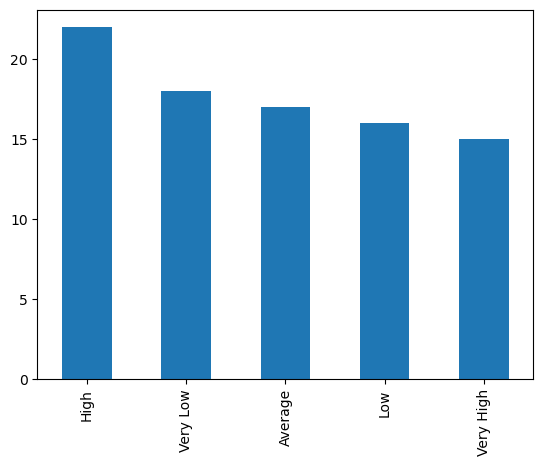

In [8]:
# pretty balance
df['Happiness score'].value_counts().plot(kind='bar')

## Missingness

In [9]:
# no missing value
df.isnull().sum()

Country or region               0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
name                            0
region                          0
sub-region                      0
Terrorist_attacks               0
Happiness score                 0
dtype: int64

## Outliers Detection

In [10]:
df.describe()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,0.917148,1.213807,0.745693,0.379273,0.184705,0.115159,296.720179
std,0.412638,0.293830,0.237671,0.156634,0.102516,0.103309,764.351472
min,0.026000,0.000000,0.105000,0.000000,0.000000,0.000000,1.000000
25%,0.626000,1.113250,0.567000,0.267750,0.106750,0.049250,4.750000
50%,0.960000,1.249500,0.806500,0.408000,0.179500,0.083500,38.500000
75%,1.249000,1.463500,0.898250,0.493500,0.244500,0.145750,125.611111
max,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000,6023.000000


<AxesSubplot: >

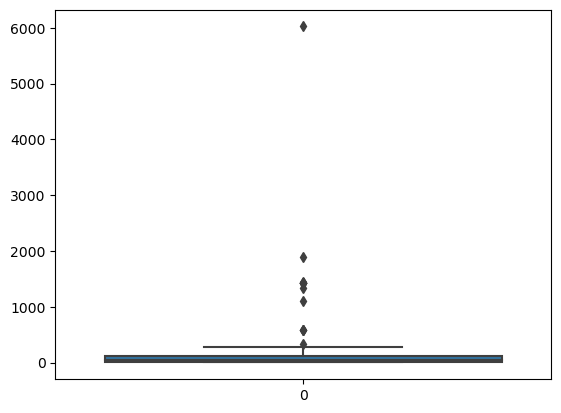

In [11]:
import seaborn as sns

sns.boxplot(df['Terrorist_attacks'])

<AxesSubplot: xlabel='Happiness score', ylabel='Terrorist_attacks'>

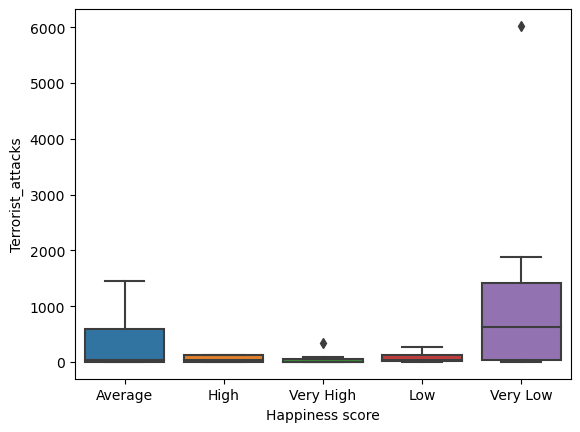

In [12]:
sns.boxplot(x="Happiness score", y="Terrorist_attacks", data=df)

In [13]:
# df = df.loc[df['Terrorist_attacks'] <= 6000]

## Bivariate Relationships

In [14]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\Ran Liao\AppData\Local\Temp\ipykernel_3140\3784545759.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks
GDP per capita,1.000000,0.753791,0.840467,0.458313,-0.069164,0.349372,-0.352544
Social support,0.753791,1.000000,0.709605,0.502305,-0.015965,0.279549,-0.339582
Healthy life expectancy,0.840467,0.709605,1.000000,0.419038,-0.024471,0.371450,-0.410411
Freedom to make life choices,0.458313,0.502305,0.419038,1.000000,0.327923,0.496876,-0.362758
Generosity,-0.069164,-0.015965,-0.024471,0.327923,1.000000,0.327683,0.032479
Perceptions of corruption,0.349372,0.279549,0.371450,0.496876,0.327683,1.000000,-0.160908
Terrorist_attacks,-0.352544,-0.339582,-0.410411,-0.362758,0.032479,-0.160908,1.000000


GDP per capita seems to be correlated with Healthy life expectancy, more than any other pair of features in the list

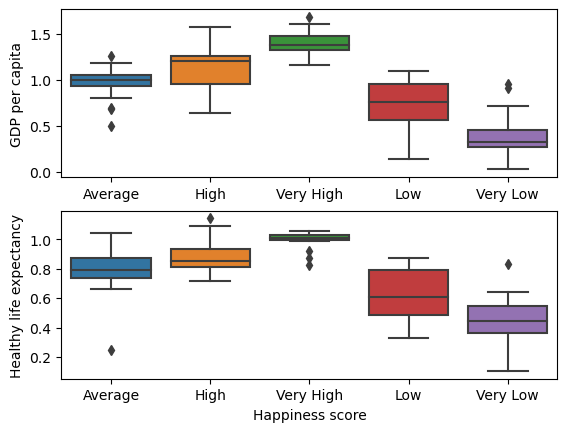

In [15]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
p1 = sns.boxplot(x="Happiness score", y="GDP per capita", data=df)
p1.set(xlabel=None)
plt.subplot(2, 1, 2)
p2 = sns.boxplot(x="Happiness score", y="Healthy life expectancy", data=df)
plt.show()

It seems that the higher the GDP per capita, the higher the Happiness score and the longer the healthy life expectancy, the higher the Happiness score, which match general expectation

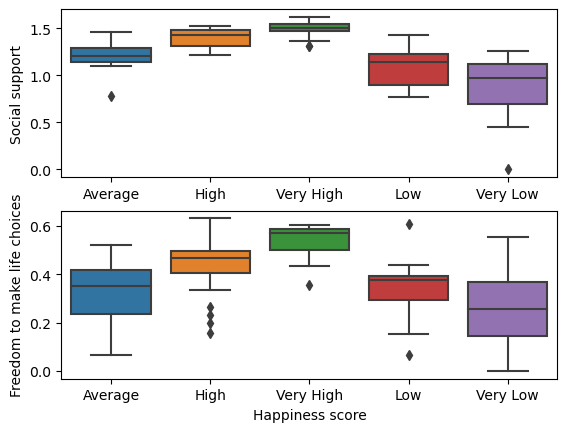

In [16]:
plt.subplot(2, 1, 1)
p1 = sns.boxplot(x="Happiness score", y="Social support", data=df)
p1.set(xlabel=None)
plt.subplot(2, 1, 2)
p2 = sns.boxplot(x="Happiness score", y="Freedom to make life choices", data=df)

Similarly, the more Social support, the higher the Happiness score and the more the Freedom to make life choices, the higher the Happiness score, which match general expectation. Note that the difference from category to category is not as distinct as the case for GDP and Healthy life expectancy

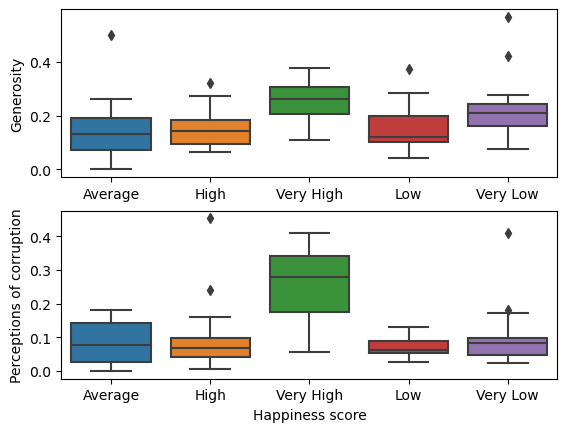

In [17]:
plt.subplot(2, 1, 1)
p1 = sns.boxplot(x="Happiness score", y="Generosity", data=df)
p1.set(xlabel=None)
plt.subplot(2, 1, 2)
p2 = sns.boxplot(x="Happiness score", y="Perceptions of corruption", data=df)
plt.show()

It is interesting to see that Geneosity is higher in country with very high and very low Hapiness score; Perceptions of corruption is much higher in general in country with very high Hapiness score whereas others within relatively the same range of Perceptions of corruption

In [18]:
df[['region','Happiness score']].groupby('region').value_counts()

region    Happiness score
Africa    Very Low           13
          Low                 8
          Average             4
Americas  High                7
          Very High           2
          Very Low            1
          Low                 1
          Average             1
Asia      High                7
          Low                 6
          Average             5
          Very Low            4
          Very High           2
Europe    Very High          10
          High                8
          Average             7
          Low                 1
Oceania   Very High           1
dtype: int64

Africa is more toward the lower end while Europe is more toward the higher end. Asia and Americas are more spread-out

In [19]:
df[['sub-region','Happiness score']].groupby('sub-region').value_counts()

sub-region                       Happiness score
Australia and New Zealand        Very High           1
Central Asia                     High                2
                                 Average             1
Eastern Asia                     High                2
                                 Average             1
Eastern Europe                   High                4
                                 Average             2
Latin America and the Caribbean  High                7
                                 Very Low            1
                                 Very High           1
                                 Low                 1
                                 Average             1
Northern Africa                  Average             3
                                 Very Low            1
Northern America                 Very High           1
Northern Europe                  Very High           5
                                 High                2
South-eastern As

# Data Preprocessing

In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    # ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']
# categorical_features = []

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    # ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

encoded_feature = preprocessor.get_feature_names_out()

In [21]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    # data.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [22]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(88, 26)

In [23]:
# split training data to training and validation for comparison purpose
from sklearn.model_selection import train_test_split
X_train_new, X_val, y_train, y_val = train_test_split(X_train, y_train_labels, test_size=0.15, random_state=42)
## TODO: replace cv with x_train

# Modeling

### Logistic Classifier with Feature selection

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression()

# Select best feature 
rfe = RFE(model)
rfe = rfe.fit(preprocessor(X_train), y_train_labels)
print(f'score:', rfe.score(preprocessor(X_train), y_train_labels))

# Summarize the selection of the features
# print(rfe.support_)
print(f'features ranking:', rfe.ranking_)
selected_fea = encoded_feature[rfe.support_]
selected_fea

score: 0.8513513513513513
features ranking: [ 1  1  1  1  1  1  1  6  1  4  2 13 14  9 11  5  1  7 12 10  8  1  1  1
  1  3]


array(['num__GDP per capita', 'num__Social support',
       'num__Healthy life expectancy',
       'num__Freedom to make life choices', 'num__Generosity',
       'num__Perceptions of corruption', 'num__Terrorist_attacks',
       'cat__region_Americas',
       'cat__sub-region_Latin America and the Caribbean',
       'cat__sub-region_Southern Asia', 'cat__sub-region_Southern Europe',
       'cat__sub-region_Sub-Saharan Africa',
       'cat__sub-region_Western Asia'], dtype=object)

In [26]:
[fea for fea in encoded_feature if fea not in selected_fea]

['cat__region_Africa',
 'cat__region_Asia',
 'cat__region_Europe',
 'cat__region_Oceania',
 'cat__sub-region_Australia and New Zealand',
 'cat__sub-region_Central Asia',
 'cat__sub-region_Eastern Asia',
 'cat__sub-region_Eastern Europe',
 'cat__sub-region_Northern Africa',
 'cat__sub-region_Northern America',
 'cat__sub-region_Northern Europe',
 'cat__sub-region_South-eastern Asia',
 'cat__sub-region_Western Europe']

In [27]:
from sklearn.metrics import accuracy_score
y_pred = rfe.predict(preprocessor(X_val))
accuracy_score(y_val_labels, y_pred)

0.42857142857142855

It looks like all the numerical features are important features while some categorical features tells us more information than others. Specifically, Asia and Americas rank the highest amongst area information.

### Logistic with L1 regularization (feature selection)

In [28]:
model = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, random_state=0)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.8108108108108109

In [29]:
w = model.coef_[0]
print(w)
encoded_feature[w != 0]

[-0.05954422  0.          0.         -0.22826561  0.          0.
  0.56366812  0.         -0.54217454  0.          0.          0.
  0.          0.          0.          0.         -0.42599351  0.
  0.          0.          0.          0.          0.62736644  0.
  0.          0.        ]


array(['num__GDP per capita', 'num__Freedom to make life choices',
       'num__Terrorist_attacks', 'cat__region_Americas',
       'cat__sub-region_Latin America and the Caribbean',
       'cat__sub-region_Southern Europe'], dtype=object)

In [30]:
y_pred = model.predict(preprocessor(X_val))
accuracy_score(y_val_labels, y_pred)

0.42857142857142855

Test Result
- Accuracy: 44.12%
- F1 score: 43.00%
- Precision: 50.10%
- Recall: 46.71%

### Logistic with Elastic Net

In [31]:
model = LogisticRegression(l1_ratio=0.8, penalty='elasticnet', solver='saga', max_iter=1000, random_state=0)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.8243243243243243

In [32]:
w = model.coef_[0]
print(w)
encoded_feature[w != 0]

[-0.11219198  0.          0.         -0.25694673  0.          0.06917819
  0.55980774  0.         -0.52772067  0.          0.07498014  0.
  0.          0.          0.          0.         -0.49426468  0.
  0.          0.          0.          0.          0.69804405 -0.09307573
  0.          0.        ]


array(['num__GDP per capita', 'num__Freedom to make life choices',
       'num__Perceptions of corruption', 'num__Terrorist_attacks',
       'cat__region_Americas', 'cat__region_Europe',
       'cat__sub-region_Latin America and the Caribbean',
       'cat__sub-region_Southern Europe',
       'cat__sub-region_Sub-Saharan Africa'], dtype=object)

In [33]:
y_pred = model.predict(preprocessor(X_val))
accuracy_score(y_val_labels, y_pred)

0.42857142857142855

Test Result
- Accuracy: 47.06%
- F1 score: 46.38%
- Precision: 55.16%
- Recall: 49.57%

Overall speaking, Terrorist_attacks is the most important feature that in all three logistic classifiers, which is a feature I will not consider removing in my future model

### Random Forest with hyperparameter tuning

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_estimators': np.arange(100, 300, 100),'max_depth':[3, 5, 7]} 
gridmodel = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
gridmodel.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))

best mean cross-validation score: 0.743
best parameters: {'max_depth': 7, 'n_estimators': 100}


In [38]:
y_pred = gridmodel.best_estimator_.predict(preprocessor(X_val))
accuracy_score(y_val_labels, y_pred)

0.42857142857142855

In [39]:
feature_importance = gridmodel.best_estimator_.feature_importances_
importance_df = pd.DataFrame({'features': encoded_feature,
                              'importance': feature_importance})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df[:10]

,features,importance
0,num__GDP per capita,0.195994
1,num__Social support,0.133652
2,num__Healthy life expectancy,0.132049
3,num__Freedom to make life choices,0.125405
5,num__Perceptions of corruption,0.100249
4,num__Generosity,0.080372
6,num__Terrorist_attacks,0.076902
23,cat__sub-region_Sub-Saharan Africa,0.029327
16,cat__sub-region_Latin America and the Caribbean,0.019030
7,cat__region_Africa,0.016953


Test Result
- Accuracy: 52.94%
- F1 score: 51.56%
- Precision: 71.39%
- Recall: 55.29%

### Random Forest with Feature Selection

In [40]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, max_depth = 7,random_state=0)) 
sel.fit(preprocessor(X_train), y_train_labels)

encoded_feature[sel.get_support()]

array(['num__GDP per capita', 'num__Social support',
       'num__Healthy life expectancy',
       'num__Freedom to make life choices', 'num__Generosity',
       'num__Perceptions of corruption', 'num__Terrorist_attacks'],
      dtype=object)

In [41]:
y_pred = sel.estimator_.predict(preprocessor(X_val))
accuracy_score(y_val_labels, y_pred)

0.35714285714285715

It looks like all the numerical features are the more important ones in predicting the hapiness score, even though it doesn't improve the accuracy score. I consider removing the categorical features from training data and see what happen

### Gradient Boosting Forest

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid = {'n_estimators': np.arange(100, 300, 100),'max_depth': np.arange(1,7,2)} 
gridmodel = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid=param_grid, cv=4)

#use meta model methods to fit score and predict model:
gridmodel.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))

best mean cross-validation score: 0.661
best parameters: {'max_depth': 3, 'n_estimators': 200}


In [44]:
model_best = GradientBoostingClassifier(n_estimators=100, learning_rate=1.3,
    max_depth=1, random_state=0).fit(preprocessor(X_train), y_train_labels)
model_best.score(preprocessor(X_train), y_train_labels)

1.0

In [45]:
y_pred = model_best.predict(preprocessor(X_val))
accuracy_score(y_val_labels, y_pred)

0.5

In [46]:
feature_importance = model_best.feature_importances_
importance_df = pd.DataFrame({'features': encoded_feature,
                              'importance': feature_importance})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df[:10]

,features,importance
0,num__GDP per capita,0.504419
1,num__Social support,0.168158
4,num__Generosity,0.059242
5,num__Perceptions of corruption,0.053457
3,num__Freedom to make life choices,0.051765
22,cat__sub-region_Southern Europe,0.035832
23,cat__sub-region_Sub-Saharan Africa,0.034604
16,cat__sub-region_Latin America and the Caribbean,0.022867
6,num__Terrorist_attacks,0.017432
24,cat__sub-region_Western Asia,0.015279


Test Result
- Accuracy: 58.89%
- F1 score: 57.65%
- Precision: 65.60%
- Recall: 59.5%

### Gradient Boosting Forest without categorical features

In [315]:
model_2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.3,
    max_depth=1, random_state=0).fit(preprocessor(X_train), y_train_labels)
model_2.score(preprocessor(X_train), y_train_labels)

1.0

In [317]:
y_pred = model_2.predict(preprocessor(X_val))
accuracy_score(y_val_labels, y_pred)

0.6

Test Result
- Accuracy: 52.94%
- F1 score: 52.40%
- Precision: 60%
- Recall: 53.43%

By comparing my best model on training data with and without categorical features, it looks like including region and subregion information help predicting the Happiness score

## Best Model

In [47]:
model_best

GradientBoostingClassifier(learning_rate=1.3, max_depth=1, random_state=0)